# Imports

In [1]:
from PIL import Image, ImageOps, ImageDraw, ImageEnhance
from bresenham import bresenham
from skimage.color import rgb2gray
from skimage.draw import line
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
import dlib

# Parameters

In [2]:
# Parameters 
INPUT_IMAGE_PATH = "img/dali_small.jpg"
OUTPUT_IMAGE_PATH = "out/" + INPUT_IMAGE_PATH[4:]
NAIL_DISTANCE = 10
LINE_DARKNESS = 170
ITERATIONS = 2000

MASK_BACKGROUND_COLOR = 100
MASK_FACE_COLOR = 120
MASK_FEATURES_COLOR = 150


# print("Parameters:")
# print("INPUT_IMAGE_PATH: " + INPUT_IMAGE_PATH)
# print("OUTPUT_IMAGE_PATH: " + OUTPUT_IMAGE_PATH)
# print("OUTPUT_IMAGE_DIMENSIONS: " + str(OUTPUT_IMAGE_DIMENSIONS))
# print("OUTPUT_IMAGE_RADIUS: " + str(OUTPUT_IMAGE_RADIUS))
# print("OUTPUT_IMAGE_CENTER_POSITION: " + str(OUTPUT_IMAGE_CENTER_POSITION))
# print("NAILS_AMOUNT: " + str(NAILS_AMOUNT))
# print("SKIP_NEIGHBOUR_NAILS: " + str(SKIP_NEIGHBOUR_NAILS))

In [3]:
#
# Display 
#
def display_threads(lines, image):
    canvas = image.copy()
    for line in lines:
        draw = ImageDraw.Draw(canvas)
        draw.line((line[0][0], line[0][1], line[1][0], line[1][1]), fill=0, width=1)
    display(canvas)

def display_nails(nails, image):
    canvas = image.copy()
    for nail in nails:
        canvas.putpixel((int(nail[0]), int(nail[1])), 0)
    display(canvas)


#
# Image
#
def get_input_image(): 
    image = Image.open(INPUT_IMAGE_PATH).convert('L')
    image = ImageEnhance.Contrast(image).enhance(1.5)
    return image

def generate_new_image(dimensions):
    return Image.new('L', dimensions, 255)

def generate_input_image_edges():
    t_lower = 100
    t_upper = 200
    filter = 3
    image = get_input_image()
    return Image.fromarray(cv2.Canny(np.array(image), t_lower, t_upper, apertureSize=filter))

def draw_line(image, line, color):
    draw = ImageDraw.Draw(image)
    draw.line((line[0][0], line[0][1], line[1][0], line[1][1]), fill=color, width=1)
    return image

def draw_point(image, point, color):
    draw = ImageDraw.Draw(image)
    draw.point((point[0], point[1]), fill=color)
    return image

#
# Points
#
def generate_nail_positions(dimensions):
    nails = []
    
    x0, y0 = 0, 0
    x1, y1, = dimensions[0] - 1, 0
    x2, y2 = dimensions[0] - 1, dimensions[1] - 1
    x3, y3 = 0, dimensions[1] - 1

    for i in range(x0, x1, NAIL_DISTANCE):
        nails.append((i, y0))

    for i in range(y1, y2, NAIL_DISTANCE):
        nails.append((x1, i))

    for i in range(x2, x3, -NAIL_DISTANCE):
        nails.append((i, y2))

    for i in range(y3, y0, -NAIL_DISTANCE):
        nails.append((x3, i))

    return nails


def is_on_same_edge(point1, point2, dimensions):
    if point1[0] == 0 and point2[0] == 0:
        return True
    if point1[0] == dimensions[0] - 1 and point2[0] == dimensions[0] - 1:
        return True
    if point1[1] == 0 and point2[1] == 0:
        return True
    if point1[1] == dimensions[1] - 1 and point2[1] == dimensions[1] - 1:
        return True
    return False

def generate_thread_positions(nails, dimensions):
    threads = []
    for i in range(0, len(nails)):
        for j in range(i, len(nails)):
            if is_on_same_edge(nails[i], nails[j], dimensions):
                continue
            threads.append((nails[i], nails[j]))
    return threads

def get_threads_from_nail(threads, nail):
    threads_from_nail = []
    for thread in threads:
        if nail in thread:
            threads_from_nail.append(thread)
    return threads_from_nail


def get_other_end_of_thread(thread, nail):
    if nail == thread[0]:
        return thread[1]
    else:
        return thread[0]

def generate_nail_to_threads_dictionary(nails, threads):
    nail_to_thread_dictionary = {}
    for nail in nails:
        nail_to_thread_dictionary[nail] = get_threads_from_nail(threads, nail)
    return nail_to_thread_dictionary

def generate_thread_to_points_dictionary(threads):
    thread_to_points_dictionary = {}
    for thread in threads:
        a, b = line(thread[0][0], thread[0][1], thread[1][0], thread[1][1])
        points = []
        for i in range(len(a)):
            points.append((a[i], b[i]))
        thread_to_points_dictionary[thread] = points
    return thread_to_points_dictionary


#
# Test 
#
input_image = get_input_image()
input_image_edges = generate_input_image_edges()
output_image = generate_new_image(input_image.size)

nails = generate_nail_positions(input_image.size)
threads = generate_thread_positions(nails, input_image.size)

ntt = generate_nail_to_threads_dictionary(nails, threads)
ttp = generate_thread_to_points_dictionary(threads)

# print("Input image")
# display(input_image)

# print("Input image edges")
# display(input_image_edges)

# print("Output image")
# display(output_image)

# print("Nails")
# display_nails(nails, output_image)

# print("Threads")
# display_threads(get_threads_from_nail(threads, nails[0]), output_image)

# print("Threads from dictionary")
# display_threads(ntt[nails[0]], output_image)

# print("Thread points from dictionary")
# display_nails(ttp[threads[0]], output_image)






Current nail # 0 :  (0, 0)


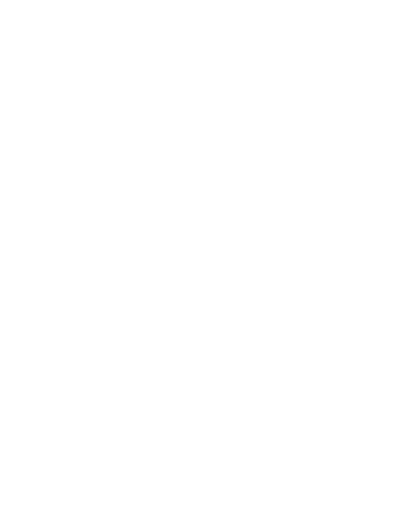

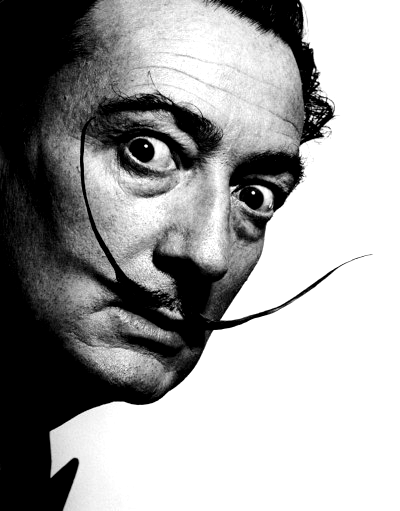

(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(16, 0)
(17, 0)
(18, 0)
(19, 0)
(20, 1)
(21, 1)
(22, 1)
(23, 1)
(24, 1)
(25, 1)
(26, 1)
(27, 1)
(28, 1)
(29, 1)
(30, 1)
(31, 1)
(32, 1)
(33, 1)
(34, 1)
(35, 1)
(36, 1)
(37, 1)
(38, 1)
(39, 1)
(40, 1)
(41, 1)
(42, 1)
(43, 1)
(44, 1)
(45, 1)
(46, 1)
(47, 1)
(48, 1)
(49, 1)
(50, 1)
(51, 1)
(52, 1)
(53, 1)
(54, 1)
(55, 1)
(56, 1)
(57, 1)
(58, 1)
(59, 1)
(60, 2)
(61, 2)
(62, 2)
(63, 2)
(64, 2)
(65, 2)
(66, 2)
(67, 2)
(68, 2)
(69, 2)
(70, 2)
(71, 2)
(72, 2)
(73, 2)
(74, 2)
(75, 2)
(76, 2)
(77, 2)
(78, 2)
(79, 2)
(80, 2)
(81, 2)
(82, 2)
(83, 2)
(84, 2)
(85, 2)
(86, 2)
(87, 2)
(88, 2)
(89, 2)
(90, 2)
(91, 2)
(92, 2)
(93, 2)
(94, 2)
(95, 2)
(96, 2)
(97, 2)
(98, 2)
(99, 2)
(100, 3)
(101, 3)
(102, 3)
(103, 3)
(104, 3)
(105, 3)
(106, 3)
(107, 3)
(108, 3)
(109, 3)
(110, 3)
(111, 3)
(112, 3)
(113, 3)
(114, 3)
(115, 3)
(116, 3)
(117, 3)
(118, 3)
(119, 3)
(120, 3)
(121, 3)
(122, 3)
(12

IndexError: index 400 is out of bounds for axis 1 with size 400

In [10]:
# calculetes how much inputting this thread will decrease the quality of input image, hence improving the output image
def get_thread_panelty(thread, ttp, input_image, input_image_mask):

    input_image_array = np.asarray(input_image, dtype="int32")
    input_image_sum = input_image_array.sum()
    input_image_avg = input_image_sum / input_image_array.size
    # print("Input image avg: " + str(input_image_avg))

    new_image_array = input_image_array.copy()
    # set values of point in list to 0
    # print(new_image_array[500][500])

    for point in ttp[thread]:
        print(point)
        # new_image_array[point[0], point[1]] = 255
    new_image_sum = new_image_array.sum()
    new_image_avg = new_image_sum / new_image_array.size
    # print("New image avg: " + str(new_image_avg))

    return abs(input_image_avg - new_image_avg)

    # input_image_mask_array = np.asarray(input_image_mask, dtype="int32") / 255
    # print(input_image_mask_array)



    # >>> a = np.array([[0,1,2],[2,2,3]])
    # >>> a
    # array([[0, 1, 2],
    #        [2, 2, 3]])
    # >>> weights = np.array([16,4,2])
    # >>> np.dot(a,weights)
    # array([ 8, 46])


    # # input_weighted_sum = 
    # input_weighted_avg = input_weighted_sum / input_image_array.size
    # print("Input weighted avg: " + str(input_weighted_avg))

    
    

    pixels = ttp[thread]
    old = []
    new = []
    w = []
    for pixel in pixels:
        old.append(input_image.getpixel(pixel))
        new.append(max(input_image.getpixel(pixel) - LINE_DARKNESS, 0))
        w.append(input_image_mask.getpixel(pixel)/255)
    
    old = np.array(old)
    new = np.array(new)
    w = np.array(w)

    new_w_pixel_values = new * w
    old_w_pixel_values = old * w
    new_penalty = new_w_pixel_values.sum() - 0.55*new_w_pixel_values[new < 0].sum()
    old_penalty = old_w_pixel_values.sum() - 0.55*old_w_pixel_values[old < 0].sum()

    return old_penalty - new_penalty


    for i in ttp[thread]:
        inaccuracy += Math.max(input_image.getpixel(i) * input_image_mask.getpixel(i)) - Math.min(input_image.getpixel(i)*input_image_mask.getpixel(i))
    return inaccuracy / len(ttp[thread])
    
def get_best_fitting_thread(threads, ttp, input_image, input_image_edges): # which thread cover the most black and the least white
    best_fitting_thread = None
    best_fitting_thread_penalty = 10000000
    for thread in threads:
        penalty = get_thread_panelty(thread, ttp, input_image, input_image_edges)
        if penalty < best_fitting_thread_penalty:
            best_fitting_thread = thread
            best_fitting_thread_penalty = penalty
    return best_fitting_thread



used_threads = []
current_nail = nails[0] # might change to start from a different nail
current_input_image = input_image.copy()

for i in range(0, ITERATIONS):

    print("Current nail #", i, ": ", str(current_nail))
    if i % 100 == 0:
        display_threads(used_threads, output_image)
        display(current_input_image)
        
    # Make dictionary nail to threads
    current_threads = ntt[current_nail]

    # print("Current threads: ", str(current_threads))
    
    selected_thread = get_best_fitting_thread(current_threads, ttp, current_input_image, input_image_edges)
    # selected_thread = current_threads[np.random.randint(0, len(current_threads))]

    used_threads.append(selected_thread)
    ntt[current_nail].remove(selected_thread)
    ntt[get_other_end_of_thread(selected_thread, current_nail)].remove(selected_thread)

    if len(ntt[current_nail]) == 1: # If only one thread left, nail is done
        for thread in ntt[current_nail]:
            ntt[current_nail].remove(thread)
            ntt[get_other_end_of_thread(thread, current_nail)].remove(thread)


    draw_line(current_input_image, selected_thread, 255 - LINE_DARKNESS)
    current_nail = get_other_end_of_thread(selected_thread, current_nail)

current_input_image.save('nails.png')
display_threads(used_threads, output_image)


# Own algorithm

# TODO
usun tlo
zrob dla strikte samej twarzy


In [ ]:

# # Start at random nail 
# # Get all unused threds from that nail
# # Put through fitness function
# # Select best thread
# # Add to used threads
# # Go to next nail
# # Repeat until fitness function returns positive values
# # If no positive values, undo last nail and choose second best thread (parametrize how many step to go back)
# # Repeat until no improvement can be made

# # Save image

# input_image = get_input_image()
# input_image_mask = get_input_image_mask(input_image)
# output_image = generate_new_image(OUTPUT_IMAGE_DIMENSIONS)
# nails = generate_nail_positions(OUTPUT_IMAGE_RADIUS, OUTPUT_IMAGE_CENTER_POSITION, NAILS_AMOUNT)
# threads = generate_thread_positions(nails)
# # display(nails)
# # display(nails[0])

# # display(input_image)
# # display(threads)
# # display(threads[0])
# # display_points(nails, output_image)

# ntt = generate_nail_to_threads_dictionary(nails, threads)
# ttp = generate_thread_to_points_dictionary(threads)
# # display_threads(ntt[nails[0]], output_image)

# # display(ntt)
# # display(ntt[nails[0]])

# # display(ttp[threads[0]])